# Discrete Time Model Simulating Breast Cancer States

## Introduction

In [79]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

We have simulated a model following 1000 women after they have had a breast tumor removed. The women can be in the five different states described below.\
state 1: No reoccurence of cancer (initial state).\
state 2: Local reoccurence.\
state 3: Distant metastasis.\
state 4: Local reoccurence and distant metastasis.\
state 5: Death. 

Women can move forward through these states in any order (except going directly from 1 to 4), but they can not move back again. Death can occur from any state. The probabilities of moving between the different states are given in the P-matrix below. The simulation is terminated when all women have entered state 5. 
We assume that each time step is one month. 

The basic algorithm can be seen here:

In [29]:
P = np.array([[0.9915, 0.005, 0.0025, 0, 0.001],
              [0, 0.986, 0.005, 0.004, 0.005], 
              [0, 0, 0.992, 0.003, 0.005],
              [0, 0, 0, 0.991, 0.009],
              [0, 0, 0, 0, 1]])

max_state = 5
n_women = 1000
women_states = np.ones(n_women)
lifetime = np.zeros(n_women)
states = np.arange(1,max_state+1)

# Run until max_state is reached for all individuals
while np.min(women_states) < max_state:
    
    # Make temporary vector with women's states
    new_women_states = women_states
    
    # Update states
    for i in range(1, int(np.max(women_states)) + 1):
        index_state = np.where(women_states == i)[0]
        new_women_states[index_state] = np.random.choice(states, size = len(index_state), p = P[i-1,:])
    women_states = new_women_states
    
    # Update liftime
    index_lifetime = np.where(women_states < max_state)[0]
    lifetime[index_lifetime] += 1

## Distribution of Lifetimes
First, we have plotted a distribution of lifetimes. So, a distribution of the number of months the women have lived after the start of the simulation (their breast tumor removal). 

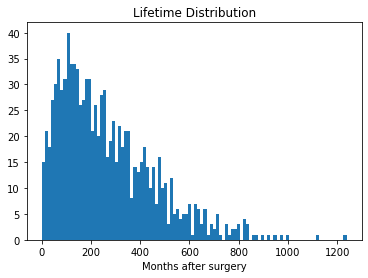

In [47]:
# Plot histogram of lifetime
plt.figure()
plt.hist(lifetime, bins = 100)
plt.title("Lifetime Distribution")
plt.xlabel("Months after surgery")
plt.ylabel("")
plt.show()

We see that most of the women die within 400 months = 33,33 years. However, a few women live > 1000 months = 83,33 years. This does not seem realistic as this corresponds to the average life expectancy of women in Denmark. So, the women who live > 1000 months after surgery actually live a whole lifetime after having had their breast tumor removed. This will be discussed further later.

## Proportion of Women with Local Reapperance
Now, we want to find the proportion of women where the cancer reappears locally after their surgery. We define this as women who go through either state 2 or 4. However, if the same women move through both state 2 and 4, we will only count her once.
To find these, we run the above algorithm where we count the number of women who go from state 1 to 2 or 4 and from state 3 to 4 (expect if they have earlier been in state 2). We don't count transitions from state 2 to 4 as the cancer has already reappeared in state 2 - and we therefore don't want to count them again if they also go through state 4. 

In [77]:
max_state = 5
n_women = 1000
women_states = np.ones(n_women)
lifetime = np.zeros(n_women)
states = np.arange(1,max_state+1)

# Store number of women going to state 2 - or 4 (without having been in state 2 before)
reappearance = 0

# Store women going from state 1 to 2
all_1_to_2 = np.array([])

# Run until max_state is reached for all individuals
while np.min(women_states) < max_state:
    
    # Make temporary vector with women's states
    new_women_states = women_states
    
    # Update states
    for i in range(1, int(np.max(women_states)) + 1):
        index_state = np.where(women_states == i)[0]
        new_women_states[index_state] = np.random.choice(states, size = len(index_state), p = P[i-1,:])
        
        # Count women going to state 2 or 4 in this time step
        # From state 1 -> 2 or 1 -> 4
        if i == 1: 
            index_1_to_2 = np.where(new_women_states[index_state] == 2)[0]
            index_1_to_4 = np.where(new_women_states[index_state] == 4)[0]
            
            reappearance += len(index_1_to_2) + len(index_1_to_4)
            
            # Save who has gone from 1 to 2 - in order to not count them again if they go from to 4 afterwards
            all_1_to_2 = np.append(all_1_to_2, index_1_to_2)
        
        # From state 3 -> 4
        if i == 3:
            index_3_to_4 = np.where(new_women_states[index_state] == 4)[0]
            
            index_3_to_4_old = list(set(index_3_to_4) & set(all_1_to_2))
            
            # Count only those who have not been counted before
            reappearance += len(index_3_to_4) - len(index_3_to_4_old)

    women_states = new_women_states
    
    # Update liftime
    index_lifetime = np.where(women_states < max_state)[0]
    lifetime[index_lifetime] += 1
    
print("Number of women where cancer has eventually reappeared locally: ", reappearance)
print("Proportion of women where cancer has eventually reappeared locally: ", reappearance/n_women)

Number of women where cancer has eventually reappeared locally:  652
Proportion of women where cancer has eventually reappeared locally:  0.652


In this run, the cancer eventually reappears locally for 65% of the women. 